In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
import  pandas as pd
import  os
from keras.models import Sequential, load_model
from sklearn.preprocessing import MinMaxScaler
from keras import backend as K


()
()


Epoch 1/10
Tensor("sequential_5/dense_23/Softmax:0", shape=(None, 3), dtype=float32)
Tensor("sequential_5/dense_23/Softmax:0", shape=(None, 3), dtype=float32)
12/12 [==============================] - 1s 2ms/step - loss: 0.6136
Epoch 2/10
12/12 [==============================] - 0s 2ms/step - loss: 0.6120
Epoch 3/10
12/12 [==============================] - 0s 2ms/step - loss: 0.6114
Epoch 4/10
12/12 [==============================] - 0s 2ms/step - loss: 0.6114
Epoch 5/10
12/12 [==============================] - 0s 2ms/step - loss: 0.6114
Epoch 6/10
12/12 [==============================] - 0s 2ms/step - loss: 0.6114
Epoch 7/10
12/12 [==============================] - 0s 2ms/step - loss: 0.6114
Epoch 8/10
12/12 [==============================] - 0s 2ms/step - loss: 0.6114
Epoch 9/10
12/12 [==============================] - 0s 8ms/step - loss: 0.6114
Epoch 10/10
12/12 [==============================] - 0s 2ms/step - loss: 0.6114


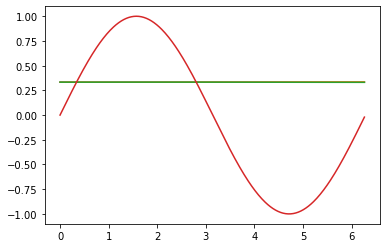

In [16]:
x_train = 3.14*np.arange(360)/180
y_train = np.sin(x_train)

model =  Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(1,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=3,activation=tf.nn.softmax))
# model.add(Activation('softmax'))
def my_loss(y_true, y_pred):
    # y is an one-hot vector
    print(y_pred)
    yp = y_pred[0]
    return K.mean(K.square(yp - y_true), axis=-1)

model.compile(optimizer='adam', loss=my_loss)

model.fit(x=x_train, y=y_train, epochs=10)

y_pred = model.predict(x=x_train)
plt.plot(x_train, y_pred)
plt.plot(x_train, y_train)
plt.show()


Epoch 1/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5514
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4218
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3729
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3344
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2998
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2685
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2462
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2170
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1890
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1754
Epoch 11/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1713
Epoch 12/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1546
Epoch 13/100
12/12 [=================

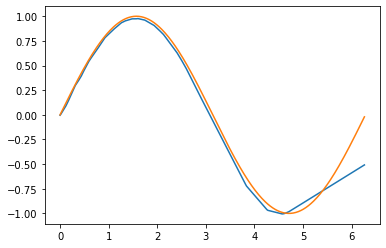

In [8]:
x_train = 3.14*np.arange(360)/180
y_train = np.sin(x_train)

model =  Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(1,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1))


model.compile(optimizer='adam', loss='mse')

model.fit(x=x_train, y=y_train, epochs=100)

y_pred = model.predict(x=x_train)
plt.plot(x_train, y_pred)
plt.plot(x_train, y_train)
plt.show()


基于数值特征的三分类

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris
data=load_iris()
iris_target=data.target
iris_data=np.float32(data.data)
iris_target=np.float32(tf.keras.utils.to_categorical(iris_target,num_classes=3))
iris_data=tf.data.Dataset.from_tensor_slices(iris_data).batch(50)
iris_target=tf.data.Dataset.from_tensor_slices(iris_target).batch(50)



2022-02-20 10:48:21.104139: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:

print(data.target.shape)
print(data.data.shape)
print(iris_target)

(150,)
(150, 4)


AttributeError: 'BatchDataset' object has no attribute 'size'

In [62]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(3,activation='softmax'))
opt=tf.optimizers.Adam(1e-3)
for epoch in range(1000):
    for _data,lable in zip(iris_data,iris_target):
        with tf.GradientTape() as tape:
            logits=model(_data)
            # print(lable.shape, lable)
            # loss value needs to be modified

            loss_value=tf.reduce_mean(tf.keras.losses.categorical_crossentropy(
                    y_true=lable,y_pred=logits))
            print('loss value:',loss_value)
            grads=tape.gradient(loss_value,model.trainable_variables)
            opt.apply_gradients(zip(grads,model.trainable_variables))
    print('Training loss is:',loss_value.numpy() )

loss value: tf.Tensor(2.5816584, shape=(), dtype=float32)
loss value: tf.Tensor(0.60489297, shape=(), dtype=float32)
loss value: tf.Tensor(1.3456986, shape=(), dtype=float32)
Training loss is: 1.3456986
loss value: tf.Tensor(1.9007415, shape=(), dtype=float32)
loss value: tf.Tensor(0.7272631, shape=(), dtype=float32)
loss value: tf.Tensor(1.1432557, shape=(), dtype=float32)
Training loss is: 1.1432557
loss value: tf.Tensor(1.5098761, shape=(), dtype=float32)
loss value: tf.Tensor(0.8455151, shape=(), dtype=float32)
loss value: tf.Tensor(1.0206523, shape=(), dtype=float32)
Training loss is: 1.0206523
loss value: tf.Tensor(1.2442976, shape=(), dtype=float32)
loss value: tf.Tensor(0.92140466, shape=(), dtype=float32)
loss value: tf.Tensor(0.9407256, shape=(), dtype=float32)
Training loss is: 0.9407256
loss value: tf.Tensor(1.0967357, shape=(), dtype=float32)
loss value: tf.Tensor(0.9786774, shape=(), dtype=float32)
loss value: tf.Tensor(0.8628363, shape=(), dtype=float32)
Training loss is

KeyboardInterrupt: 

In [72]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd

# data=load_iris()
# iris_target=data.target
# iris_data=np.float32(data.data)
# iris_target=np.float32(tf.keras.utils.to_categorical(iris_target,num_classes=3))
data_1 = pd.read_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/3指标体系/data/bitcoin_indicator.xlsx')
data_2 = pd.read_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/3指标体系/data/gold_indicator.xlsx')
data_3 = pd.read_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/3指标体系/data/price_volatility.xlsx')
data_indicator = np.concatenate((data_1.values,data_2.values),axis=1)
target_u = data_3[['u_gold','u_bitcoin']].values[10:]
batch_size = 50
data_indicator=tf.data.Dataset.from_tensor_slices(data_indicator).batch(batch_size)
target_u=tf.data.Dataset.from_tensor_slices(target_u).batch(batch_size)
a1 = 0.01
a2 = 0.02


model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(3,activation='softmax'))
opt=tf.optimizers.Adam(1e-3)
for epoch in range(1000):
    for _data,lable in zip(data_indicator,target_u):
        with tf.GradientTape() as tape:
            logits=model(_data)
            # print(lable.shape, lable)
            
            # loss value needs to be modified
            # loss 的含义是 batch_size 天内的收益
            # lable 50,2; logits 50,3 
            
            # value = np.zeros(batch_size)
            # value[0] = 1
            
            # for t in range(batch_size-1):
            #     u = np.zeros((1,3))
            #     u[:,1:] = lable[t+1]
            #     u = u.reshape(3,1)
            #     prob = np.array(logits[t+1]).reshape(1,3)
            #     transaction_cost = abs(lable[t+1][0]) * a1 + abs(lable[t+1][1]) * a2 
            #     # print((value[t] * prob).dot(u+1))
            #     # print(value[t] * prob * (u+1) - transaction_cost)

            #     value[t+1] = (value[t] * prob).dot(u+1) - transaction_cost

            # TR = value[batch_size-1] - value[0]
            # loss_value = 1/TR
            # # loss_value = tf.Tensor(loss_value,value_index=(), dtype=tf.float32)
            # loss_value = tf.reduce_mean(tf.convert_to_tensor(loss_value,dtype=tf.float32))

            def get_loss(y_true, y_pred):
                batch_size = 50
                value = np.zeros(batch_size)
                value[0] = 1
                for t in range(batch_size-1):
                    u = np.zeros((1,3))
                    u[:,1:] = lable[t+1]
                    u = u.reshape(3,1)
                    prob = np.array(logits[t+1]).reshape(1,3)
                    transaction_cost = abs(lable[t+1][0]) * a1 + abs(lable[t+1][1]) * a2 
                    # print((value[t] * prob).dot(u+1))
                    # print(value[t] * prob * (u+1) - transaction_cost)

                    value[t+1] = (value[t] * prob).dot(u+1) - transaction_cost

                TR = value[batch_size-1] - value[0]
                loss_value = 1/TR
                # loss_value = tf.Tensor(loss_value,value_index=(), dtype=tf.float32)
                loss_value = tf.reduce_mean(tf.convert_to_tensor(loss_value,dtype=tf.float32))              
                return loss_value

            loss_value = get_loss(lable,logits)
            # loss_value = tf.Tensor(loss_value)
            # loss_value=tf.reduce_mean(tf.keras.losses.categorical_crossentropy(
            #         y_true=lable,y_pred=logits))
            print('loss value:', loss_value)

            grads=tape.gradient(loss_value,model.trainable_variables)
            opt.apply_gradients(zip(grads,model.trainable_variables))
    print('Training loss is:',loss_value.numpy() )


loss value: tf.Tensor(-21.860655, shape=(), dtype=float32)


ValueError: No gradients provided for any variable: (['dense_168/kernel:0', 'dense_168/bias:0', 'dense_169/kernel:0', 'dense_169/bias:0', 'dense_170/kernel:0', 'dense_170/bias:0', 'dense_171/kernel:0', 'dense_171/bias:0'],). Provided `grads_and_vars` is ((None, <tf.Variable 'dense_168/kernel:0' shape=(18, 64) dtype=float32, numpy=
array([[ 0.19742948, -0.10431659,  0.26767385, ...,  0.003012  ,
         0.19838628, -0.05312939],
       [ 0.15130797, -0.04367582, -0.13900506, ..., -0.03985104,
         0.18629485, -0.09898938],
       [ 0.06746188, -0.04878646,  0.09262177, ..., -0.16498837,
        -0.07625727, -0.21430695],
       ...,
       [-0.06377374, -0.23086095, -0.14188395, ...,  0.11375564,
        -0.04438969, -0.2555705 ],
       [ 0.10887769, -0.03555462, -0.20593688, ...,  0.09438753,
        -0.06359993, -0.10652468],
       [ 0.18952459,  0.11936933,  0.01040462, ...,  0.20864537,
         0.09110931, -0.12907104]], dtype=float32)>), (None, <tf.Variable 'dense_168/bias:0' shape=(64,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>), (None, <tf.Variable 'dense_169/kernel:0' shape=(64, 128) dtype=float32, numpy=
array([[-1.46444276e-01, -3.34895849e-02, -1.35298923e-01, ...,
         7.51799345e-03, -1.56808659e-01, -9.74798426e-02],
       [-3.60042751e-02, -1.06608510e-01,  6.48951083e-02, ...,
         2.74836272e-02, -8.31086561e-02, -1.09950885e-01],
       [-2.29530483e-02,  7.76250511e-02, -8.90766010e-02, ...,
        -4.28326130e-02, -7.51021877e-02, -3.38479280e-02],
       ...,
       [-9.11356434e-02,  9.69639271e-02,  1.10460892e-01, ...,
        -1.60995856e-01, -1.52339041e-03,  5.36310226e-02],
       [-1.00275695e-01,  6.58039600e-02, -1.79283768e-02, ...,
        -1.26207724e-01, -1.40707284e-01, -1.62662551e-01],
       [ 1.02944076e-02,  5.56907356e-02,  1.27702951e-04, ...,
        -1.70709267e-01, -1.55449539e-01, -1.57297805e-01]], dtype=float32)>), (None, <tf.Variable 'dense_169/bias:0' shape=(128,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>), (None, <tf.Variable 'dense_170/kernel:0' shape=(128, 32) dtype=float32, numpy=
array([[-7.7545837e-02,  8.7927490e-02, -1.6217847e-01, ...,
        -8.2276911e-03, -4.7364712e-02, -1.9313799e-01],
       [-8.2969375e-02,  1.6132891e-01, -1.6293742e-01, ...,
         1.5377656e-02,  1.0528779e-01,  1.3304105e-01],
       [-1.3354075e-01, -1.8542416e-01, -1.4812668e-01, ...,
        -8.3281808e-02,  1.2046054e-02, -1.0734460e-01],
       ...,
       [ 2.1016523e-02,  1.4211819e-02, -1.2673438e-04, ...,
         1.3758963e-01, -4.7146827e-02, -3.5619959e-02],
       [-6.7070842e-02, -1.4825407e-01,  1.9334108e-02, ...,
        -1.5477800e-01, -1.4473243e-01, -5.6041926e-03],
       [-1.7265388e-01, -5.8268011e-02,  8.8322967e-02, ...,
         9.1381699e-02, -1.2689695e-01, -1.3943017e-04]], dtype=float32)>), (None, <tf.Variable 'dense_170/bias:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>), (None, <tf.Variable 'dense_171/kernel:0' shape=(32, 3) dtype=float32, numpy=
array([[-0.14802611, -0.17663312,  0.24846485],
       [ 0.14170894,  0.20962772, -0.2235752 ],
       [ 0.25409856, -0.142681  , -0.35423818],
       [-0.35873434, -0.22375527,  0.30103424],
       [ 0.03979909, -0.06450826, -0.08402258],
       [-0.24260809,  0.31510583,  0.25095245],
       [-0.26781625,  0.34018192,  0.04174289],
       [-0.09700334,  0.07669389, -0.356626  ],
       [-0.1723568 , -0.18671633, -0.40805772],
       [ 0.30375198, -0.09862858, -0.19336556],
       [ 0.37528083, -0.03854156, -0.1912805 ],
       [-0.31775108,  0.20650467, -0.33391097],
       [ 0.27144143,  0.4087684 , -0.1812588 ],
       [ 0.2466388 ,  0.34021053,  0.09756497],
       [ 0.41183266,  0.2655494 , -0.15584153],
       [-0.13322464, -0.11051285,  0.13289544],
       [-0.33438343, -0.12576783,  0.40554455],
       [ 0.37565777, -0.38698402,  0.24261996],
       [-0.39886266,  0.00347713,  0.04457262],
       [-0.4079673 , -0.17909843, -0.28399962],
       [-0.0095993 , -0.1248005 , -0.09170592],
       [-0.19293664,  0.17376962,  0.30902448],
       [ 0.12625852, -0.22401735,  0.01145673],
       [-0.34048152,  0.30327544, -0.11391011],
       [-0.25769645, -0.03775835, -0.1359928 ],
       [ 0.29896125, -0.25628224, -0.38777888],
       [-0.2455024 ,  0.13248578, -0.10831308],
       [-0.3034248 ,  0.37395015,  0.04530638],
       [-0.2807859 ,  0.40852126, -0.06248668],
       [ 0.4078144 ,  0.16696164,  0.089964  ],
       [ 0.09533539, -0.20072375,  0.20853624],
       [-0.39300898, -0.2615564 , -0.18440326]], dtype=float32)>), (None, <tf.Variable 'dense_171/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>)).

In [ ]:
for _data,lable in zip(iris_data,iris_target):
    print(lable.shape)

(50, 3)
(50, 3)
(50, 3)


In [34]:
np.ones(3) 

array([2., 2., 2.])